In [1]:
import os # 경로를 지정하거나 연산에 쓰기 위하여
import re # regular expression 주어진 규칙에 맞는 언어 연산
import pandas as pd # 데이터처리 및 데이터과학을 위한 라이브러리
import tensorflow as tf # 데이터 다운받는 용도로 필요
from tensorflow.keras import utils # 데이터 다운받는 용도로 필요

# IMBD 데이터 다운로드
data_set = tf.keras.utils.get_file(
    fname = "imdb.tar.gz", # 다운받은 파일의 이름
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract = True)
def directory_data(directory):
  data = {}
  data["review"] = []
  for file_path in os.listdir(directory):
    with open(os.path.join(directory, file_path), "r", encoding='utf-8') as file:
      data["review"].append(file.read())
  return pd.DataFrame.from_dict(data)
def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0
  return pd.concat([pos_df, neg_df])
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))
imdb_pd = pd.concat([train_df, test_df])
imdb_pd.head()

84125825/84125825 [==============================] - 5s 0us/step


,review,sentiment
0,The morbid Catholic writer Gerard Reve (Jeroen...,1
1,"""Kolchak: the Night Stalker"" is a hugely enter...",1
2,"Like the great classic Bugs Bunny cartoons, th...",1
3,A wonderful early musical film from Rene Clair...,1
4,"This is a good movie, a good family movie to w...",1


In [2]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
set_stopwords = set(stopwords.words('english')) # 영어 불용어를 가져와 집합으로 구성

def preprocessing(review, remove_stopwords=True):
    review_text = BeautifulSoup(review, 'html5lib').get_text()
    review_text = re.sub("[^a-zA-Z]", " ", review_text) # subtitution 즉 대체하라는 의미 -> a-z, A-Z를 제외함 (^a-zA-Z), 알파벳에 해당하지 않는 문자는 빈 칸으로 대체

    if remove_stopwords:
        words = review_text.split()
        words = [w for w in words if not w in set_stopwords]
        review_text = ' '.join(words)
    review_text = review_text.lower()
    return review_text



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
reviews = list(imdb_pd['review'])
reviews = [preprocessing(r) for r in reviews]

print(reviews[0])
tokenized_reviews = [r.split() for r in reviews]
print(tokenized_reviews[0])
review_len_by_words = [len(t) for t in tokenized_reviews]
review_len_by_alphabet = [len(s.replace(' ', '')) for s in reviews]
print(review_len_by_alphabet[0])

<ipython-input-2-dffa08322490>:9: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(review, 'html5lib').get_text()


the morbid catholic writer gerard reve jeroen krabb homosexual alcoholic frequent visions death invited give lecture literature club vlissingen while railway station amsterdam feels non corresponded attraction handsome man embarks another train gerard introduced treasurer club beautician christine halsslag ren e soutendijk wealthy widow owns beauty shop sphinx one night stand on next morning gerard sees picture christine boyfriend herman thom hoffman recognizes man saw train station he suggests bring herman house spend couple days together secret intention seducing man christine travels k ln bring boyfriend gerard stays alone house he drinks whiskey snoops safe finding three film reels names men decides watch footages discover christine married three guys died tragic accidents later gerard believes christine witch question whether herman doomed fourth husband the ambiguous the vierde man another magnificent feature paul verhoeven dutch phase the story supported excellent screenplay use

In [4]:
print(review_len_by_words[0])

219


Text(0, 0.5, 'Number of Reviews')

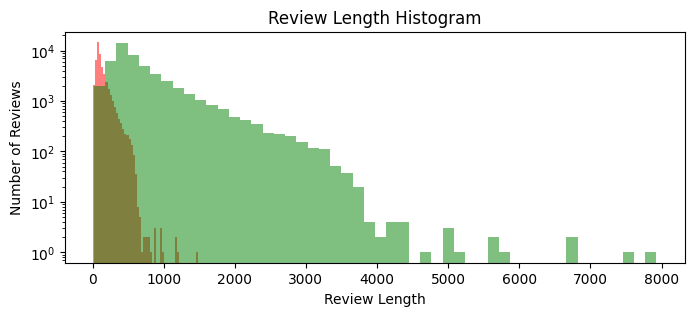

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
plt.hist(review_len_by_words, bins=50, alpha=0.5, color='r')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='g')
plt.yscale('log', nonpositive='clip')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [ ]:
import numpy as np
print('최대 단어수를 가지는 문장은 몇 개의 단어인가? ', np.max(review_len_by_words))
print('최소 단어수를 가지는 문장은 몇 개의 단어인가? ', np.min(review_len_by_words))
print('평균적으로 몇 개의 단어를 가지는가? ', np.mean(review_len_by_words))
print('문장에 있는 단어들 수의 표준편차는? ', np.std(review_len_by_words))
print('문장의 단어수들의 중간 값은? ', np.median(review_len_by_words))
print('문장의 하위 10% 길이는? ', np.percentile(review_len_by_words, 10))

최대 단어수를 가지는 문장은 몇 개의 단어인가?  1481
최소 단어수를 가지는 문장은 몇 개의 단어인가?  4
평균적으로 몇 개의 단어를 가지는가?  129.72192
문장에 있는 단어들 수의 표준편차는?  96.15245286269925
문장의 단어수들의 중간 값은?  97.0
문장의 하위 10% 길이는?  51.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fa78a17f640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa78a2fcd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa78a17d750>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa78a2fdd50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa78a2fff40>],
 'means': [<matplotlib.lines.Line2D at 0x7fa78a2ffca0>]}

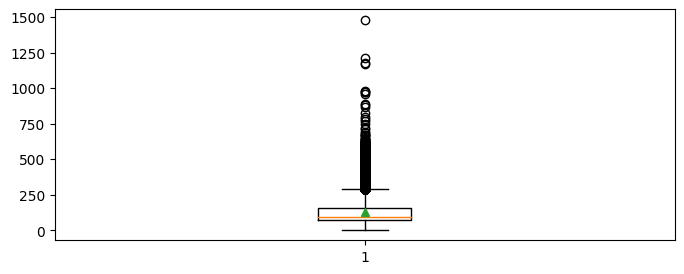

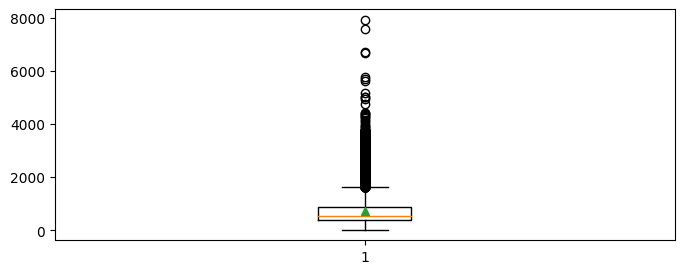

In [ ]:
plt.figure(figsize=(8,3))
plt.boxplot([review_len_by_words], showmeans=True)
plt.figure(figsize=(8,3))
plt.boxplot([review_len_by_alphabet], showmeans=True)

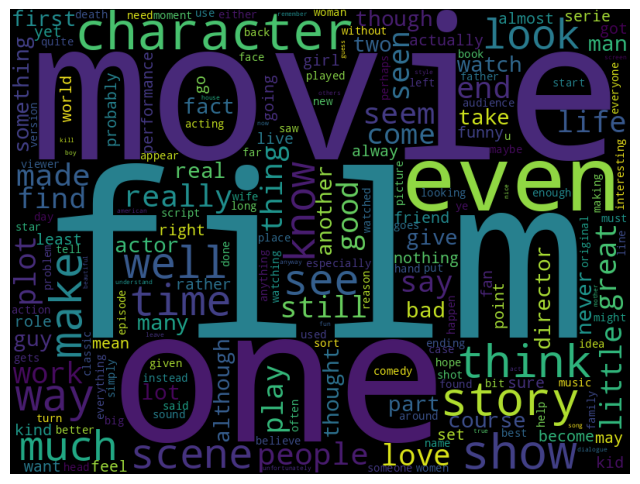

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', width=800, height=600).generate(' '.join(reviews))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

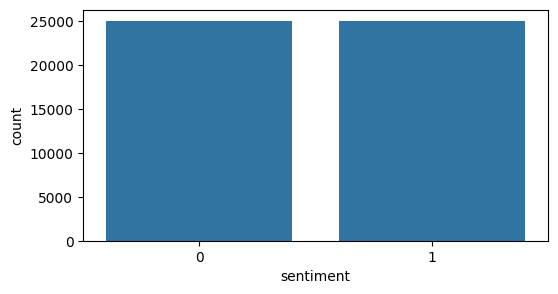

In [ ]:
import seaborn as sns

sentiment = imdb_pd['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(x=imdb_pd['sentiment'])
plt.show()

In [ ]:
sentiment

sentiment
1    25000
0    25000
Name: count, dtype: int64